In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import time

class MovieGenrePredictor:
    def __init__(self, classifier):
        self.train_data = None
        self.test_data = None
        self.test_solution_data = None
        self.label_encoder = None
        self.tfidf_vectorizer = None
        if classifier == "LinearSVC":
            self.classifier = LinearSVC()
        elif classifier == "MultinomialNB":
            self.classifier = MultinomialNB()
        elif classifier == "LogisticRegression":
            self.classifier = LogisticRegression(max_iter=500)
        else:
            raise ValueError("Invalid model name. Please provide one of the following: 'LinearSVC', 'MultinomialNB', 'LogisticRegression'") 

    def load_data(self, train_file, test_file, test_solution_file):
        '''
        Loads train, test and test solution data from csv file using pandas.
        '''
        self.train_data = pd.read_csv(train_file, sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
        self.test_data = pd.read_csv(test_file, sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
        self.test_solution_data = pd.read_csv(test_solution_file, sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

    def visualize_data(self):
        '''
        Visualize data using seaborn.
        '''
        # Visualize genre distribution
        plt.figure(figsize=(20, 8))
        sns.countplot(y=self.train_data['GENRE'], palette='Spectral', order=self.train_data['GENRE'].value_counts().index)
        plt.title('Number of Movies per Genre')
        plt.xlabel('Number of Movies')
        plt.ylabel('Genre')
        plt.show()

        # Visualize description length by genre
        self.train_data['DESCRIPTION_length'] = self.train_data['DESCRIPTION'].apply(len)
        plt.figure(figsize=(15, 5))
        sns.barplot(x='GENRE', y='DESCRIPTION_length', palette='Spectral', data=self.train_data)
        plt.title('Description Length by Genre')
        plt.xticks(rotation=45)
        plt.xlabel('Genre')
        plt.ylabel('Description Length')
        plt.show()

        # Visualize top 10 most frequent genres
        top_genres = self.train_data['GENRE'].value_counts().head(10)
        plt.figure(figsize=(20, 10))
        top_genres.plot(kind='barh', color='#FFA07A')
        plt.title('Top 10 Most Frequent Genres')
        plt.xlabel('Number of Movies')
        plt.ylabel('Genre')
        plt.gca().invert_yaxis()
        plt.show()

    def preprocess_data(self):
        '''
        Preprocesses the movie data before training the classifier.
        '''
        # Handle missing values
        self.train_data.fillna({'DESCRIPTION': ""}, inplace=True)
        self.test_data.fillna({'DESCRIPTION': ""}, inplace=True)
        
        # Vectorize descriptions
        self.tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=100000)
        X_train = self.tfidf_vectorizer.fit_transform(self.train_data['DESCRIPTION'])
        X_test = self.tfidf_vectorizer.transform(self.test_data['DESCRIPTION'])

        # Encode labels
        self.label_encoder = LabelEncoder()
        y_train = self.label_encoder.fit_transform(self.train_data['GENRE'])
        y_test = self.label_encoder.transform(self.test_solution_data['GENRE'])

        return X_train, X_test, y_train, y_test

    def train_classifier(self, X_train, y_train):
        '''
        Uses the chosen classifier on train dataset to train the model.
        '''
        # Split train data
        X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

        start_time = time.time()
        # Train the chosen model
        self.classifier.fit(X_train_sub, y_train_sub)
        end_time = time.time()
        print(f"The total time taken for training is: {end_time - start_time}")
        
        # Predict and evaluate on validation set
        y_val_pred = self.classifier.predict(X_val)
        print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
        print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

    def test_classifier(self, X_test, y_test):
        '''
        Predict and evaluate on test set.
        '''
        y_pred = self.classifier.predict(X_test)
        print("Test Accuracy:", accuracy_score(y_test, y_pred))
        print("Test Classification Report:\n", classification_report(y_test, y_pred))

    def predict_movie_genre(self, description):
        '''
        Predicts the genre of a movie based on its description.
        '''
        vectorizer = self.tfidf_vectorizer.transform([description])
        pred_label = self.classifier.predict(vectorizer)
        return self.label_encoder.inverse_transform(pred_label)[0]

In [2]:
# Making instance of the model and then loaading the data.
predictor = MovieGenrePredictor("LinearSVC")
predictor.load_data("Movie Genre Prediction Dataset/train_data.txt", 
                        "Movie Genre Prediction Dataset/test_data.txt", 
                        "Movie Genre Prediction Dataset/test_data_solution.txt")

C:\Users\comp123\AppData\Local\Temp\ipykernel_3656\527438225.py:34: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  self.train_data = pd.read_csv(train_file, sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
C:\Users\comp123\AppData\Local\Temp\ipykernel_3656\527438225.py:35: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  self.test_data = pd.read_csv(test_file, sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
C:\Users\comp123\AppData\Local\Temp\ipykernel_3656\527438225.py:36: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separat

C:\Users\comp123\AppData\Local\Temp\ipykernel_3656\527438225.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=self.train_data['GENRE'], palette='Spectral', order=self.train_data['GENRE'].value_counts().index)


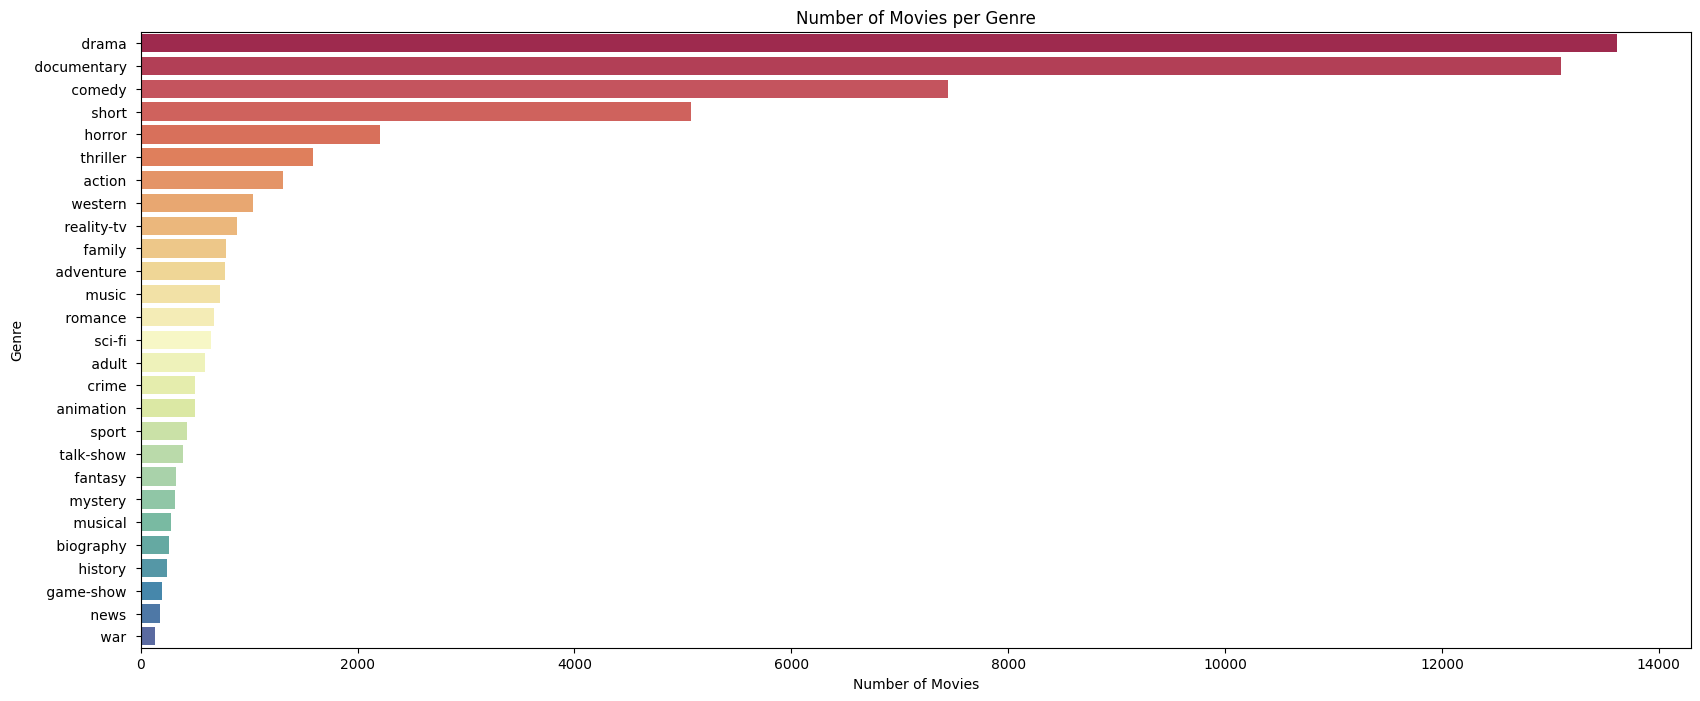

C:\Users\comp123\AppData\Local\Temp\ipykernel_3656\527438225.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GENRE', y='DESCRIPTION_length', palette='Spectral', data=self.train_data)


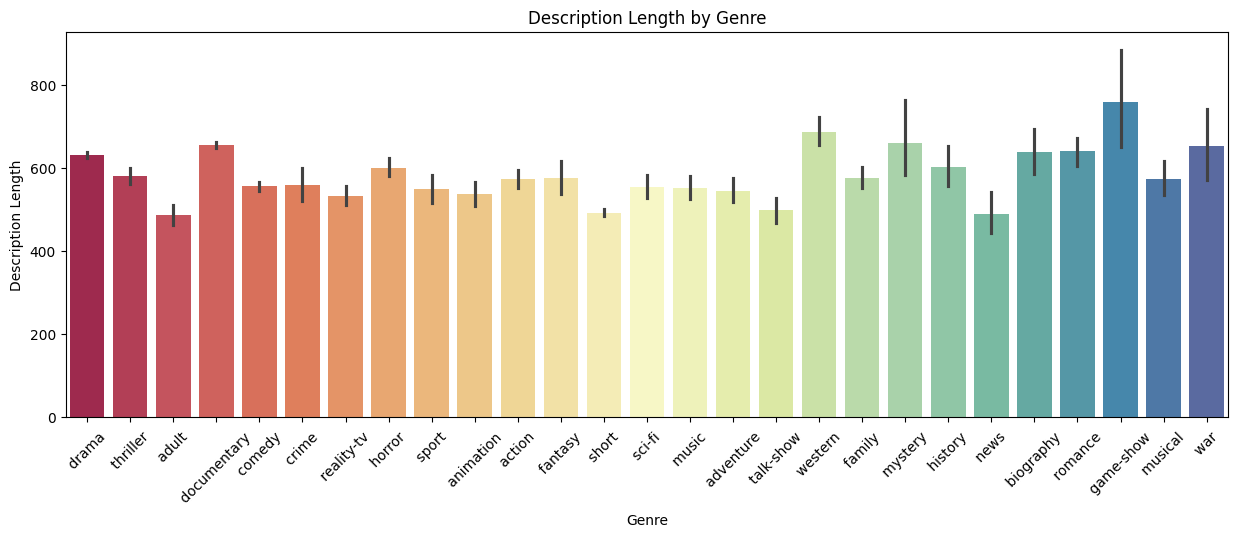

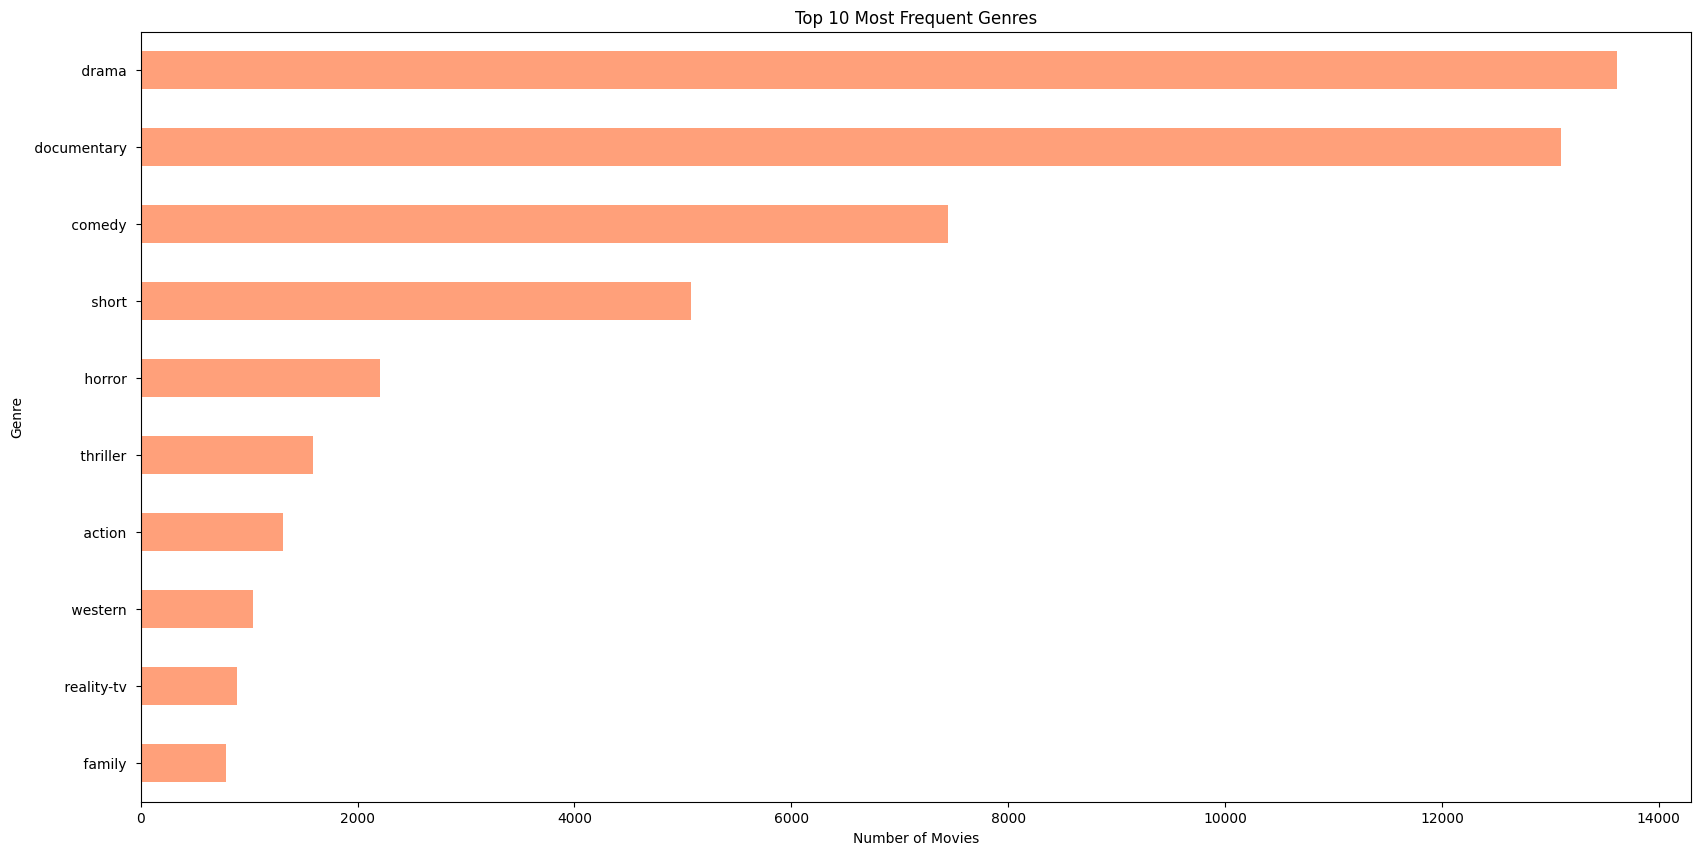

In [3]:
# Visualizing the data.
predictor.visualize_data()

In [6]:
# Training and evaluating the model.
X_train, X_test, y_train, y_test = predictor.preprocess_data()
predictor.train_classifier(X_train, y_train)
predictor.test_classifier(X_test, y_test)

C:\Users\comp123\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


The total time taken for training is: 26.867965936660767
Validation Accuracy: 0.5836945494789265
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.32      0.37       263
           1       0.74      0.44      0.55       112
           2       0.45      0.21      0.28       139
           3       0.47      0.15      0.23       104
           4       0.00      0.00      0.00        61
           5       0.53      0.59      0.56      1443
           6       0.39      0.07      0.11       107
           7       0.69      0.81      0.75      2659
           8       0.56      0.72      0.63      2697
           9       0.36      0.17      0.23       150
          10       0.13      0.03      0.04        74
          11       0.82      0.68      0.74        40
          12       0.00      0.00      0.00        45
          13       0.65      0.66      0.66       431
          14       0.61      0.53      0.57       144
   

C:\Users\comp123\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\comp123\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\comp123\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.00      0.00      0.00      7446
           6       0.00      0.00      0.00       505
           7       0.00      0.00      0.00     13096
           8       0.00      0.00      0.00     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0.00      0.00      0.00       276
          16       0.00      0.00      0.00       31

In [5]:
# Using the model to predict the genre of the movie.
sample_descr_for_movie = "There was a house known for being haunted. On March 20th, 2002, a child wandered into the house. It was really scary inside. As soon as he entered, he spotted a ghost. Terrified, he sprinted towards the door, but it slammed shut behind him. Now, the boy was trapped inside, scared by the ghosts."
print(predictor.predict_movie_genre(sample_descr_for_movie))
sample_descr_for_movie1 = "In the secluded mansion of philanthropist Mr. Haven, seven strangers gather after receiving enigmatic invitations promising redemption. Upon arrival, they find Haven dead. Among them: a struggling musician, a disgraced lawyer, a retired nurse seeking closure, a mysterious drifter, a jaded journalist, a grieving widow, and a former soldier with a guilty conscience. With tensions rising and suspicions mounting, they must unravel Haven's secrets and expose the killer among them before it's too late. As hidden agendas and personal demons come to light, they realize redemption may be their only chance at survival in this gripping tale of betrayal and intrigue."
print(predictor.predict_movie_genre(sample_descr_for_movie1))

 horror 
 thriller 
